In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
from sklearn.ensemble import AdaBoostClassifier

In [9]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.shape

(768, 9)

In [13]:
# 2.DATA SUMMARY 
# to print column names of our dataframe use .columns attribute
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
# Description of each column; what does it indicate 
# 1 Pregnancies: Number of pregnancies.
# 2 Glucose: Glucose level in blood.
# 3 BloodPressure: Blood pressure measurement.
# 4 SkinThickness: Thickness of the skin.
# 5 Insulin: Insulin level in blood.
# 6 BMI: Body mass index.
# 7 DiabetesPedigreeFunction: Diabetes percentage (likely a genetic predisposition score).
# 8 Age: Age of the individual.
# 9 Outcome: Final result (1 indicates presence of the condition, 0 indicates absence).list1 = df.columns[:-1] # not considering outcome column 
list1 = df.columns[:-1] # not considering outcome column 
list1

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [17]:
df.info() # information about dataset 
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.

In [19]:
summary = df.groupby('Outcome').agg(['mean', 'median', 'std'])
print(summary)

        Pregnancies                      Glucose                    \
               mean median       std        mean median        std   
Outcome                                                              
0          3.298000    2.0  3.017185  109.980000  107.0  26.141200   
1          4.865672    4.0  3.741239  141.257463  140.0  31.939622   

        BloodPressure                   SkinThickness  ...     Insulin  \
                 mean median        std          mean  ...         std   
Outcome                                                ...               
0           68.184000   70.0  18.063075     19.664000  ...   98.865289   
1           70.824627   74.0  21.491812     22.164179  ...  138.689125   

               BMI                  DiabetesPedigreeFunction                   \
              mean median       std                     mean median       std   
Outcome                                                                         
0        30.304200  30.05  7.689855

In [21]:
# DATA PREPROCESSING 
print(df.isnull().sum()) # handling missing values
df = df.dropna() # strikes missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


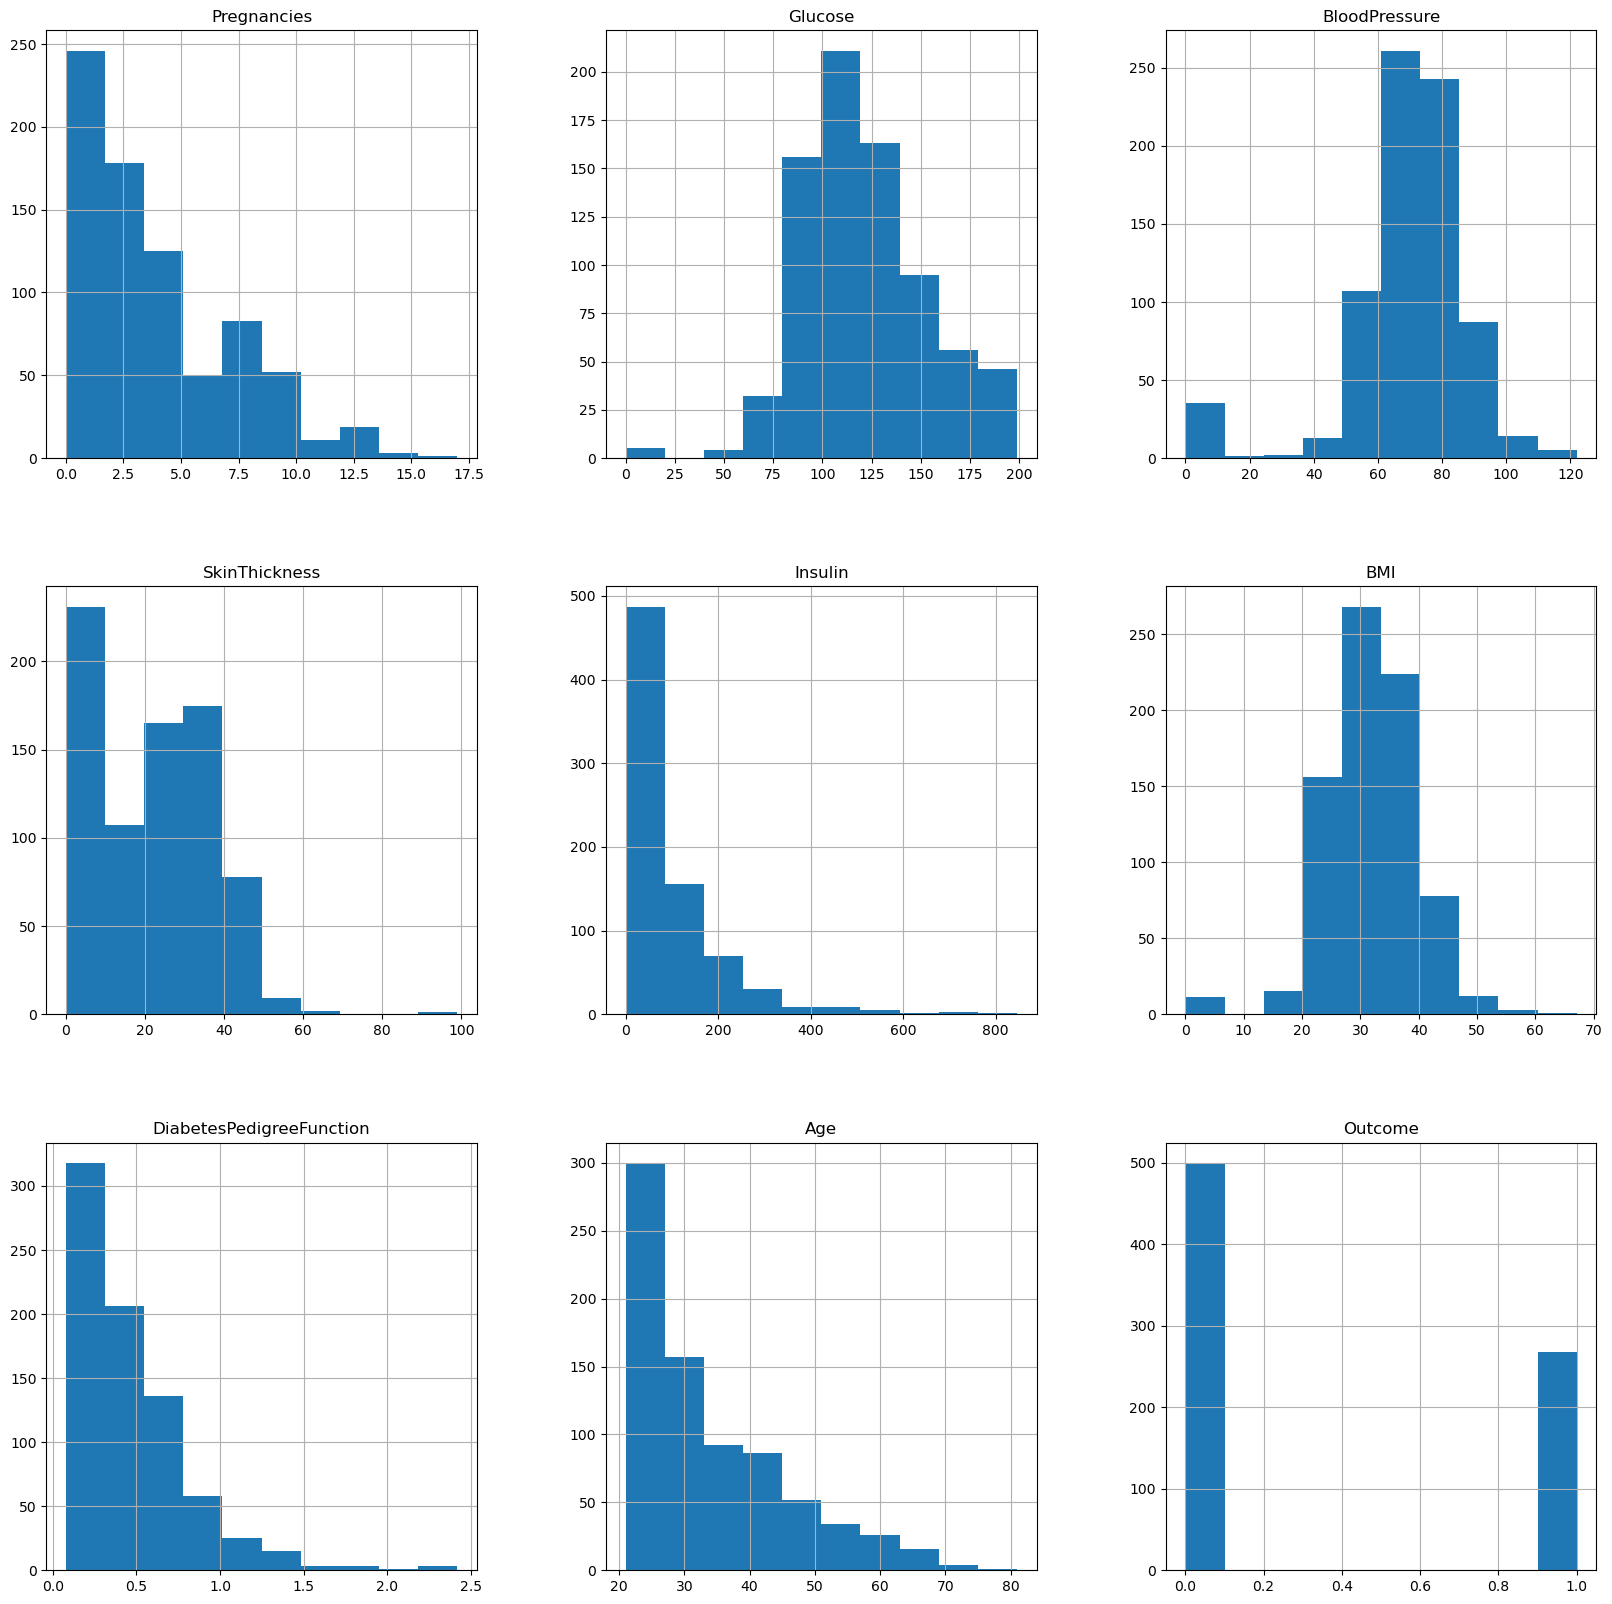

In [23]:
p = df.hist(figsize=(20, 20)) # it shows the occurrence of every value in the graphical structure, letting us know the range of the data.

C:\Users\daisy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


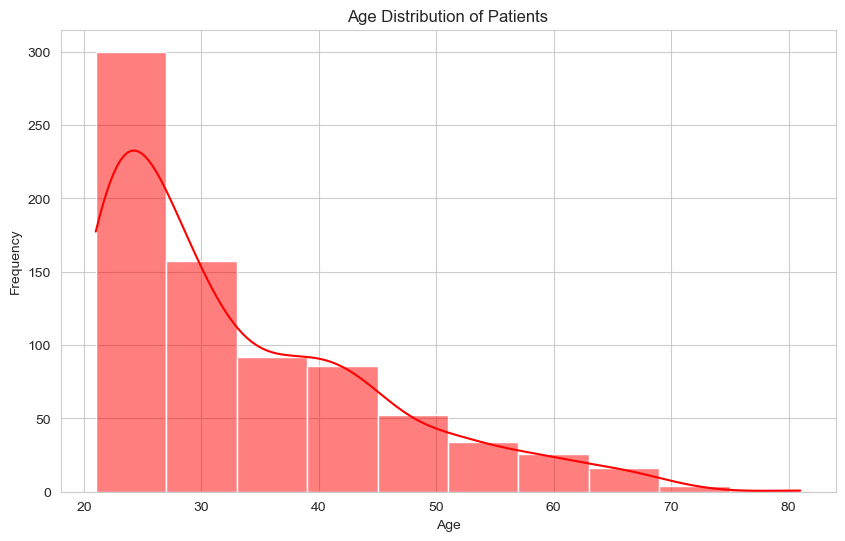

In [25]:
# Visualizing the target variable
sns.set_style('whitegrid')

# Plotting histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde = True, color = 'red', bins = 10)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Intepretation from this age distribution histogram 

#Prevalence in Younger Adults:
#The highest number of diabetic patients is found in the 20-25 age group, with approximately 175 individuals.

#Decreasing Trend with Age:
#There is a noticeable decrease in the number of diabetic patients as age increases.
#The number of patients drops steadily from the 25-30 age group onwards, showing a clear declining trend.

#Middle-Aged Adults:
#The number of diabetic patients is moderate in the 30-50 age range, with patient counts ranging from about 50 to 100 per age group.
#This suggests that while diabetes is still present in middle-aged individuals, it is less prevalent than in younger adults.

#Low Prevalence in Older Adults:
#The number of diabetic patients significantly decreases in age groups beyond 50 years.
#Very few patients are recorded above the age of 70, indicating a low prevalence in the older population.

#The data suggests that diabetes is more prevalent among younger and middle-aged individuals in this dataset.

In [29]:
# Analytics 
#1. Pregnancies: Generally, the number of pregnancies runs from 0 up to about 10, peaking at 0; thus, many participants did not have any pregnancies.
#2. *Glucose*: Glucose levels follow a normal distribution with a peak near 100-150. This might be a fasting blood sugar. 
#3. *BloodPressure*: Blood pressure readings are normally distributed with a peak around 70-80 
#4. *SkinThickness*: Skin thickness values range from 0 to about 50 with a peak near 20. 
#5. *Insulin*: Levels of insulin are right-skewed, most values below 200 with a long tail extending up to ~600. 
#6. *BMI*: The Body Mass Index values are normally distributed and peak around 30. 
#7. *DiabetesPedigreeFunction*: This function is right-skewed, indicating most values are below 1. 
#8. *Age*: A right-skewed age distribution is seen, with most participants younger than 50. 
#9. *Outcome*: this would probably be presence of diabetes, 1, or absence, 0. More participants do not have diabetes, 0. 
# In a nutshell ,these distributions give a sense of the characteristics of the dataset.
# For example, many subjects are young, while BMI and glucose levels are normally distributed, insulin levels and other measures are skewed,
#which may indicate outliers or few high values.

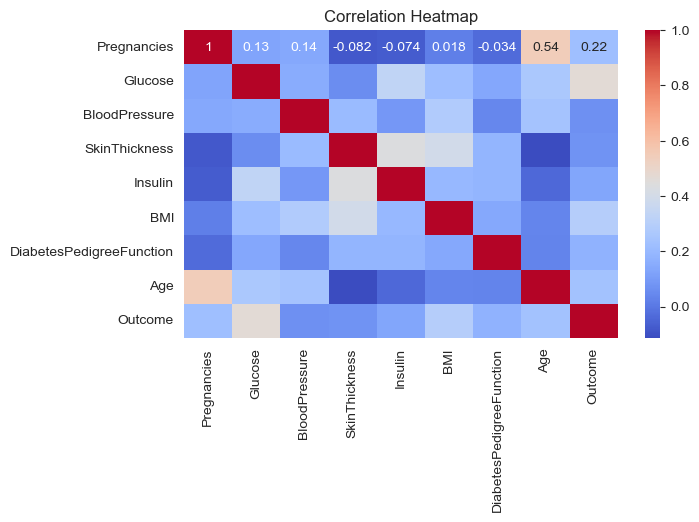

In [31]:
# Visualising correlation 
# Compute the correlation matrix
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [33]:
# Intepretation of correlation heatmap 
#This heatmap represents the correlation coefficients for different variables in the diabetes dataset.  
#1. Pregnancies: - The pregnancies feature is moderately correlated with Age (0.54). - Weakly correlated with the other variables. 
#2. Glucose: Weak to moderate correlation with BMI and Age, 0.22 and 0.13, respectively. Very weak correlation with all other variables. 
#3. BloodPressure : - Very weak correlations with other variables; no strong relationships are noted. 
#4. SkinThickness: - Very weak correlations with other variables, showing no significant relationship. 
#5. Insulin: - Very weak correlations with other variables; no strong relationships were found. 
#6. BMI: - Weak correlation with Age (0.14). - Very weak correlation with all other variables. 
#7. DiabetesPedigreeFunction: - Very weak correlations with all other variables, thus no significant relationships established. 
#8. Age: - It is moderately correlated to Pregnancies 0.54. - It weakly correlates with BMI 0.14. 
#- Very weak correlations are shared with all other variables. 
#9. Outcome (Diabetes Diagnosis): - Weak correlation with Glucose 0.22.

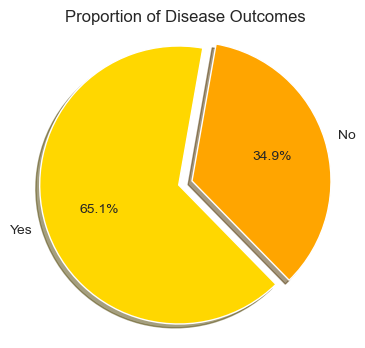

In [35]:
labels = 'Yes', 'No'
sizes = df['Outcome'].value_counts()
colors = ['gold', 'orange']
explode = (0.1, 0)  # explode the slice for 'Yes'

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=80)
plt.title('Proportion of Disease Outcomes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [37]:
# This means that 65.1% of the patients are diabetic, while 34.9% do not have diabetes.

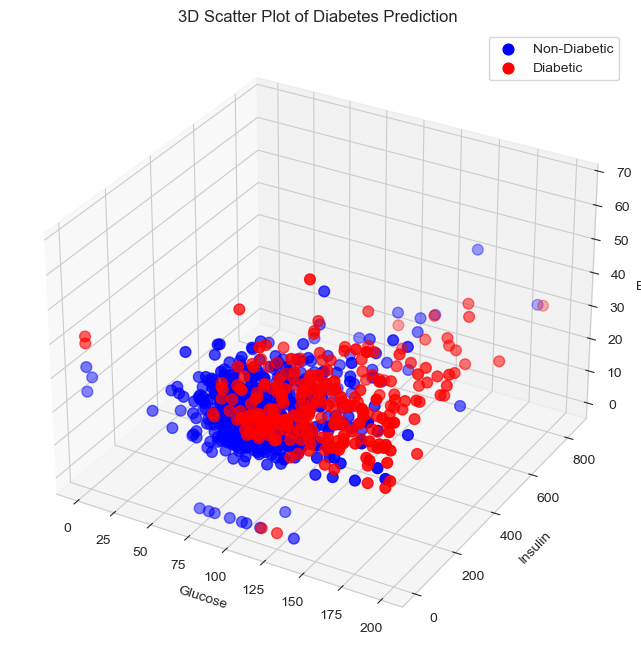

In [39]:
# Choose three different features for the 3D scatter plot
feature1 = 'Glucose'
feature2 = 'Insulin'
feature3 = 'BMI'

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for non-diabetic cases
non_diabetic = df[df['Outcome'] == 0]
ax.scatter(non_diabetic[feature1], non_diabetic[feature2], non_diabetic[feature3], 
           c='blue', label='Non-Diabetic', s=60)

# Scatter plot for diabetic cases
diabetic = df[df['Outcome'] == 1]
ax.scatter(diabetic[feature1], diabetic[feature2], diabetic[feature3], 
           c='red', label='Diabetic', s=60)

# Setting labels
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('3D Scatter Plot of Diabetes Prediction')
ax.legend()

plt.show()

In [41]:
# INTEPRETATION OF SCATTER PLOT 
# Key Observations:
# 1. Glucose Levels:
# Higher glucose levels tend to be associated with more red (diabetic) points, especially above 150.
# 2. Insulin Levels:
# Insulin levels are quite spread out among both diabetic and non-diabetic individuals. 
# However, there's a concentration of diabetic cases with higher insulin levels above 200.
# 3. Age:
# Age shows some spread across the data points, with a slight tendency for older individuals to be more frequently diabetic.

# Combined Insights:
# 1. High Glucose and Insulin: There's a notable cluster of red points (diabetic) in the higher ranges of both glucose and insulin,
# suggesting a stronger likelihood of diabetes with these combined factors.
# 2. Overlap Region: There is significant overlap between diabetic and non-diabetic individuals at lower ranges of glucose and insulin,
# indicating that these measures alone may not be sufficient for predicting diabetes without considering additional factors.
# 3. Age Distribution: Age distribution shows that individuals of varying ages can be diabetic or non-diabetic, 
# though older individuals with higher glucose and insulin levels seem more prone to diabetes.

#Conclusion:
# 1. High glucose levels are a strong indicator of diabetes.
# 2. High insulin levels, combined with high glucose levels, further increase the likelihood of diabetes.
# 3. Age also plays a role, with older individuals more frequently represented among diabetic cases, especially with higher glucose and insulin levels.
# The scatter plot emphasizes the need for considering multiple factors in predicting diabetes accurately.

In [43]:
# Intepretation 
#Outcome 1 (positive result) is associated with higher values across features like pregnancies, glucose, blood pressure, skin thickness,
#insulin, BMI, diabetes pedigree function, and age.
#Outcome 0 (negative result) shows lower averages for these features

In [45]:
# Statistical Summary vs. Graph Analysis: 
# Statistical Summary: Shows that older individuals (Outcome 1) tend to have a higher average age compared to those with Outcome 0. 
# This suggests that the condition being studied is more common in older age groups.
# Graph Analysis: If the graph shows that older age is less prone to diabetes, it could indicate that the relationship is more complex
# or that there are specific patterns or thresholds where age impacts diabetes risk differently


# Threshold Effects: There might be a threshold age beyond which the risk of diabetes changes.
# For instance, risk might increase with age up to a certain point and then level off or decrease.
# Data Distribution: The graph might reflect a specific range or subset of the data where older age groups show a different trend.
#  or Variability: There could be outliers or variability in the data that affects the overall trend.
# For instance, if very high ages are underrepresented or if there's a significant variability, it might affect the interpretation.
# Confounding Factors: Other factors might be influencing the relationship between age and diabetes.
# For instance, lifestyle, genetic factors, or comorbid conditions could play a role.

In [47]:
# input
x = df.iloc[:,:-1].values

# output 
y = df.iloc[:,-1].values

x,y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [49]:
# Feature engineering 
# Selecting the best features using SelectKBest : 

# Feature selection
from sklearn.feature_selection import SelectKBest , chi2,mutual_info_classif,f_classif

selector = SelectKBest(mutual_info_classif,k= 'all')
x_new = selector.fit_transform(x,y)
print(x_new)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [51]:
# Feature Scaling 
# to maintain consistency in data so that machine is not biased
# Standardization -> Logistic regression : transform features so that they have a mean of 0 and standard deviation of 1 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x_new)
scaled_features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [53]:
y = df.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [55]:
# Splitting the dataset -> describes role of training and testing set in model development process
# random_state -> random number generator to ensure reproductibility 
# test_size = 0.12 -> 12% for testing and 88 % for training data 
x_train,x_test,y_train,y_test = train_test_split(scaled_features,y,test_size=0.12,random_state=0)

from sklearn.tree import DecisionTreeClassifier

# Classification algorithms 
classifiers = {'Logistic Regression': LogisticRegression(),
               'Decision Tree': DecisionTreeClassifier(),
               'Random Forest': RandomForestClassifier(),
               'Support Vector Machine': SVC(),
               'Naive Bayes': GaussianNB(),
               'K-Nearest Neighbors': KNeighborsClassifier()           
}


In [57]:
print(x_train,y_train)

[[-0.84488505 -0.56004775  0.56322275 ... -1.59824051  0.05775584
  -0.95646168]
 [-0.84488505  1.34907812  0.66661825 ...  0.10247738 -0.39526196
   1.4259954 ]
 [-0.25095213 -0.30967058 -0.57412775 ... -0.31635613 -0.1264714
  -0.95646168]
 ...
 [ 0.04601433 -0.84172205 -0.2122435  ... -0.92556851 -0.97814487
  -1.04154944]
 [ 2.12477957 -1.12339636  0.25303625 ... -0.24020459 -0.51908683
   0.14967911]
 [ 0.3429808   0.47275805  0.66661825 ... -4.06047387  0.50775352
   3.04266271]] 50     0
548    0
572    0
638    1
608    0
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 675, dtype: int64


In [59]:
print(x_test,y_test)

[[-8.44885053e-01  2.44447821e+00  3.56431752e-01  1.40909441e+00
  -6.92890572e-01  1.38436175e+00  2.78492300e+00 -9.56461683e-01]
 [-5.47918591e-01 -4.34859164e-01  2.53036252e-01  5.93629620e-01
   1.75399020e-01  2.04012771e-01 -2.04994488e-01 -8.71373930e-01]
 [ 4.60143347e-02 -1.40507067e+00 -3.67336746e-01 -1.28821221e+00
  -6.92890572e-01  2.54780469e-01 -2.44256030e-01 -7.01198424e-01]
 [ 3.42980797e-01  1.41167241e+00  1.49640753e-01 -9.63790522e-02
   8.26616214e-01 -7.85957342e-01  3.47687230e-01  1.51108316e+00]
 [-1.14185152e+00 -3.09670582e-01 -2.12243497e-01 -1.28821221e+00
  -6.92890572e-01 -9.38260437e-01  5.68155894e-01 -1.90671905e-01]
 [-8.44885053e-01 -1.24858494e+00  1.49640753e-01 -1.59107113e-01
  -3.45574735e-01 -6.84421946e-01 -5.70428848e-01 -7.86286177e-01]
 [ 1.53084665e+00  9.73512376e-01  4.59827252e-01  8.44541864e-01
   7.91884630e-01  2.80164319e-01  1.27184355e+00 -2.04963989e-02]
 [-2.50952128e-01  1.72464386e+00  8.73409251e-01  4.05445437e-01
   

In [61]:
# Training and evaluating classifiers 

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

results = {}
for name, clf in classifiers.items():
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    print(f"Confusion Matrix for {name}: \n" ,cm)
    accuracy = accuracy_score(y_test,y_pred)
    results[name] = accuracy 
    print(f'{name} Accuracy : {accuracy *100:.4f} %')
    print(classification_report(y_test,y_pred)) 
    print('.............................................................')

Confusion Matrix for Logistic Regression: 
 [[61  4]
 [ 8 20]]
Logistic Regression Accuracy : 87.0968 %
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        65
           1       0.83      0.71      0.77        28

    accuracy                           0.87        93
   macro avg       0.86      0.83      0.84        93
weighted avg       0.87      0.87      0.87        93

.............................................................
Confusion Matrix for Decision Tree: 
 [[50 15]
 [ 8 20]]
Decision Tree Accuracy : 75.2688 %
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        65
           1       0.57      0.71      0.63        28

    accuracy                           0.75        93
   macro avg       0.72      0.74      0.72        93
weighted avg       0.77      0.75      0.76        93

.............................................................
Confusion Matrix for Rando

In [63]:
# Finding the best classifier 
best_classifier = max(results, key=results.get)
print(f'Best Classifier: {best_classifier} with Accuracy : {results[best_classifier]:.4f}')

Best Classifier: Logistic Regression with Accuracy : 0.8710


In [65]:
# Optimising logistic Regression

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid 
param_grid = {
    'C' : [0.001, 0.01, 0.1,1, 10],
    'penalty': ['l1' ,'l2'],
    'solver': [ 'liblinear','saga']
}

# Create a Logistic Regression Model
logistic_regression = LogisticRegression(max_iter=1000)

#Create GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression,param_grid=param_grid,cv=5,scoring ='accuracy')

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters and best scores 
best_params = grid_search.best_params_
best_score = grid_search.best_score_

y_pred = grid_search.predict(x_test)

In [69]:
print("Best Parameters:", best_params)
print("Best Score:",best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.7570370370370371


In [71]:
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

Best Model: LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score{f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8602
Precision: 0.8576
F1 Score0.8578
Confusion Matrix:
 [[60  5]
 [ 8 20]]


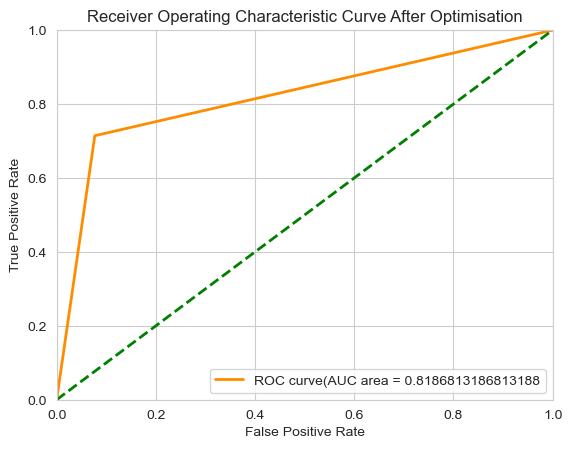

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# actual outcomes and predicted possibilities
# Calculate ROC Curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

# Calculate AUC
roc_auc = auc(fpr,tpr)

# polt roc curve

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange',lw =2 ,label =f'ROC curve(AUC area = {roc_auc}')
plt.plot([0,1],[0,1],color = 'green',lw =2 ,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve After Optimisation')
plt.legend(loc ='lower right')
plt.show()

In [77]:
# Analysis 
#1. Axes: - The x-axis is the False Positive Rate (FPR) representing what fraction of the negative instances is wrongly classified as positive.
#- The y-axis is the True Positive Rate (TPR), or sensitivity/ recall which is the fraction of the correctly identified positive instances. 
#2. Curve: - The ROC curve is the orange line. -
#The green dotted line represents the line of nullity (AUC = 0.5), that is the case where the classifier isn’t better than random guessing. 
#3. AUC (Area Under the Curve): - AUC specificity to the curve is the score with the value of about 0.8187 (0.818681316813188).
### Interpretation 1. Performance: - The AUC of 0.8187 shows a very good discrimination ability of the classifier.
#A perfect (AUC 1.0) classifier divides the cases of two groups completely, any other classifier that uses the ROC curve gives out the AUC of 0.5. 
#- An AUC result ranging from 0.7 to 0.8 is considered satisfactory, and above 0.8 is considered excellent. 
#2. True Positive Rate: - The TPR lies close to 0.9 when the FPR is set below 0.1, 
#and such a value implies that the classier is close to ideal sensitivity only with few false positives. 
#3. Optimization: - The curve is the evidence that the model has passed through the optimization stage for the betterment of its performance.
#The curve indicates very high sensitivity of the classifier and clear differentiation between positive and negative instances. 
#4. Threshold Selection: - The ROC curve is a graph of a set of technologies used to classify 
#the instances into either positive or negative points on the ROC(Receiver operating characteristic) curve 
#represent the different threshold values at which an instance is classified as positive or negative. -
#The best threshold for TPR and FPR trade-off that is tolerable for the application or domain is to be chosen.
### Conclusion The ROC curve illustrates that the model with the optimal solution achieves an AUC of 0.8187,
#showing that it is excellent and can easily draw a line between good and bad instances.
#The model exhibits a higher sensitivity as well as it shows an impressive performance that is beyond the luck factor.

In [79]:
# Create a logistic regression model with regularization ( # We decided to use this for our model)
log_reg = LogisticRegression(C=1.0, penalty='l2')

# Train the model
log_reg.fit(x_train, y_train)

# Make predictions
y_pred = log_reg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8709677419354839


In [81]:
# .............Optimizing Decision Tree..................
param_grid = {
    'max_depth': [None, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [83]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7]},
             scoring='accuracy', verbose=1)

In [85]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best Parameters:', best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [87]:
from sklearn.metrics import accuracy_score,precision_score , recall_score,f1_score,confusion_matrix

# predict on test set 
y_pred = best_model.predict(x_test)

# Calculate performance matrics
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1= f1_score(y_test,y_pred,average='weighted')
conf_matrix = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall:{recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n" , conf_matrix)

Accuracy: 0.7097
Precision:0.7333
Recall:0.7097
F1 Score: 0.7175
Confusion Matrix:
 [[48 17]
 [10 18]]


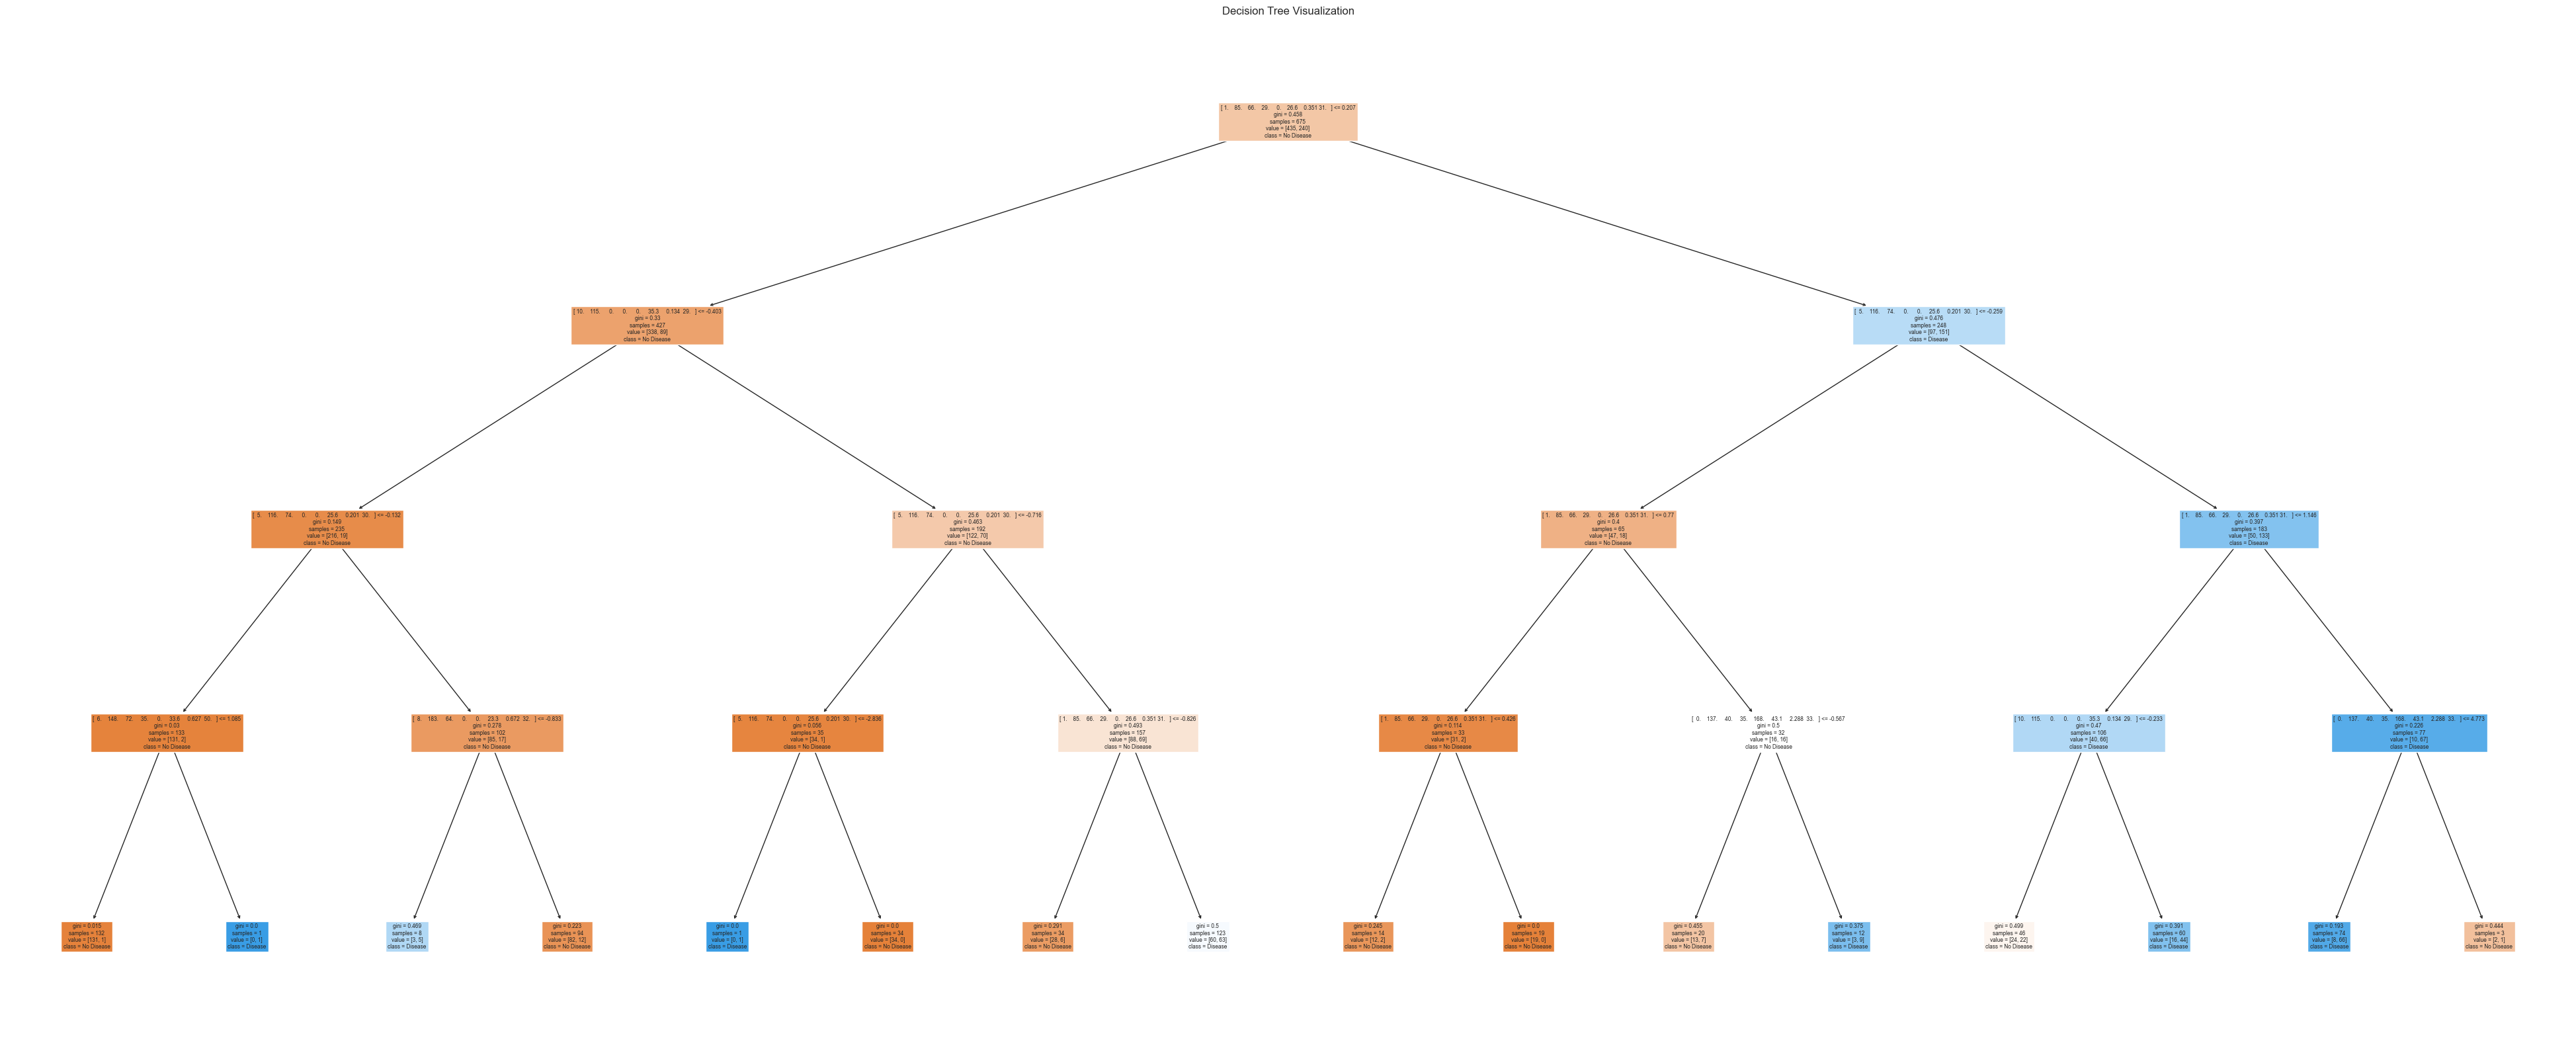

In [89]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the best model
best_model = grid_search.best_estimator_

# Plot the decision tree
plt.figure(figsize=(50, 20))
plot_tree(best_model, feature_names=x, filled=True, class_names=['No Disease', 'Disease'])
plt.title('Decision Tree Visualization')
plt.show()

In [91]:
# ..................................Applying Boosting.................................................
from sklearn.ensemble import AdaBoostClassifier

# Now you can use AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
# Fit the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Sample code to train the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, print a more detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[53 12]
 [ 9 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        65
           1       0.61      0.68      0.64        28

    accuracy                           0.77        93
   macro avg       0.73      0.75      0.74        93
weighted avg       0.78      0.77      0.78        93



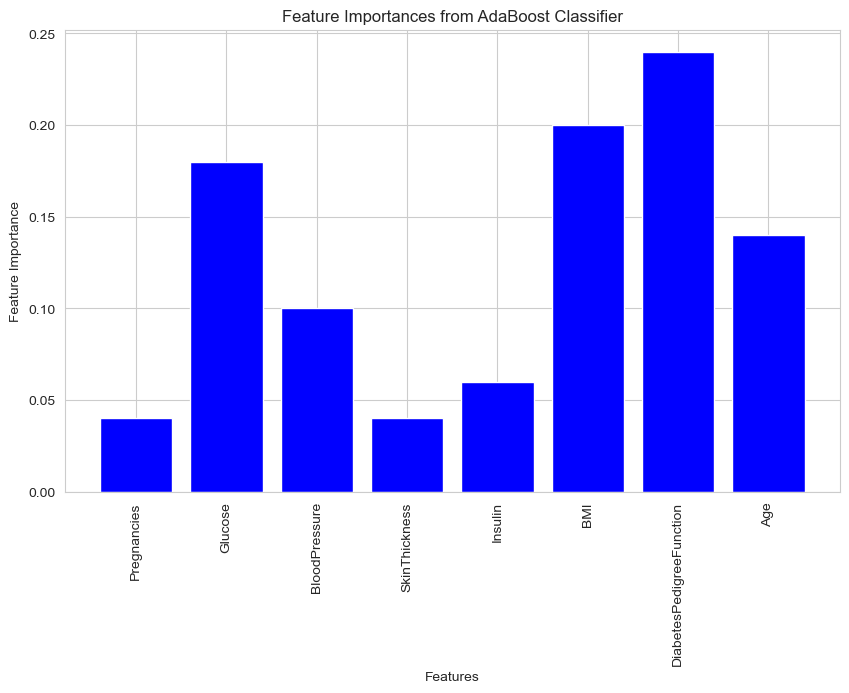

In [97]:
# Assume feature_names is a list of feature names
feature_names = list1

# Plot feature importances with feature names
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances from AdaBoost Classifier')
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)
plt.show()

In [99]:
# Get feature importances
feature_importances = clf.feature_importances_

# Print feature importances with feature names
print("\nFeature Importances:")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")


Feature Importances:
Pregnancies: 0.04
Glucose: 0.18
BloodPressure: 0.1
SkinThickness: 0.04
Insulin: 0.06
BMI: 0.2
DiabetesPedigreeFunction: 0.24
Age: 0.14


In [101]:
#............................................................Testing.................................................................................
# .............................................if new data is provided test whether diabetic or not .................................................

In [103]:
# Train a random forest classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=123)
rfc.fit(x_train, y_train)

# Create a new patient's data
new_patient = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]  # replace with your own values

# Scale the new patient's data using the same scaler used for training
new_patient_scaled = scaler.transform(new_patient)

# Use the trained model to make a prediction
prediction = rfc.predict(new_patient_scaled)

# Print the prediction
if prediction[0] == 0:
    print("The patient is not diabetic.")
else:
    print("The patient is diabetic.")

The patient is diabetic.


In [105]:
rfc.predict([[0, 137, 40, 35, 168, 43.1, 2.228, 33]]) # 4th patient

array([1], dtype=int64)

In [107]:
# Define the column names
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a function to make a prediction
def predict_diabetes():
    # Get the input values from the user
    values = input("Enter the values for the new patient (separated by commas): ")
    values = [float(x) for x in values.split(",")]

    # Create a new patient's data
    new_patient = [values]

    # Scale the new patient's data using the same scaler used for training
    new_patient_scaled = scaler.transform(new_patient)

    # Use the trained model to make a prediction
    prediction = rfc.predict(new_patient_scaled)

    # Print the prediction
    if prediction[0] == 0:
        print("The patient is not diabetic.")
    else:
        print("The patient is diabetic.")

# Call the function
predict_diabetes()

Enter the values for the new patient (separated by commas):  6, 148, 72, 35, 0, 33.6, 0.627, 50


The patient is diabetic.
